In [124]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [125]:
df = pd.read_csv('../../datasets/train.csv', encoding="latin-1")
df.head()

,Column1,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,...,Fire_Involvement,Alcohol,Drug,Product_1,Product_2,Product_3,Narrative,Stratum,PSU,Weight
0,900763,180608221.0,5/29/2018,25,1,2.0,NaN,NaN,35.0,71.0,...,0.0,NaN,NaN,3265.0,0.0,0.0,25YOM PAIN TO KNEE WHEN LIFTING WEIGHTS ...,L,42.0,55.4188
1,762342,180109488.0,1/1/2018,70,2,1.0,NaN,NaN,30.0,55.0,...,0.0,NaN,NaN,276.0,0.0,0.0,70 YOF PT STATES SHE FELL IN HER KITCHEN & HIT...,M,16.0,78.3782
2,560150,170718633.0,7/5/2017,18,1,0.0,NaN,NaN,92.0,59.0,...,0.0,NaN,NaN,3286.0,0.0,0.0,18 YO M LAC FINGER-4-WHEELER ACCIDENT,V,17.0,16.1828
3,464771,170429466.0,4/1/2017,17,2,1.0,NaN,NaN,34.0,53.0,...,0.0,NaN,NaN,4056.0,0.0,0.0,17 YOF A SHELF FELL ONTO PT WRIST CAUSING A CO...,C,32.0,4.7570
4,866180,180504499.0,4/27/2018,27,1,2.0,NaN,NaN,35.0,64.0,...,0.0,NaN,NaN,1267.0,0.0,0.0,27 YOM HAS KNEE PX WHICH WORSENS WHILE PLAYING...,V,93.0,16.5919


In [126]:
burns = df[(df["Diagnosis"] == 49.) | (df["Diagnosis"] == 46.)]

In [127]:
inputs = burns.filter(["Diagnosis", "Age", "Sex","Race", "Body_Part"]).dropna()
inputs

,Diagnosis,Age,Sex,Race,Body_Part
1014,49.0,65,2,0.0,77.0
1209,46.0,28,1,1.0,31.0
1461,49.0,30,2,1.0,82.0
3596,49.0,50,1,0.0,77.0
4337,49.0,26,2,0.0,77.0
...,...,...,...,...,...
700505,49.0,42,2,0.0,77.0
700680,49.0,223,1,2.0,76.0
701549,49.0,66,2,1.0,82.0
702092,49.0,51,1,0.0,79.0


In [128]:
age = LabelEncoder()
sex = LabelEncoder()
race = LabelEncoder()
body_part = LabelEncoder()
inputs["age_n"] = age.fit_transform(inputs["Age"])
inputs["sex_n"] = sex.fit_transform(inputs["Sex"])
inputs["race_n"] = race.fit_transform(inputs["Race"])
inputs["body_n"] = body_part.fit_transform(inputs["Body_Part"])
inputs

,Diagnosis,Age,Sex,Race,Body_Part,age_n,sex_n,race_n,body_n
1014,49.0,65,2,0.0,77.0,64,1,0,10
1209,46.0,28,1,1.0,31.0,27,0,1,1
1461,49.0,30,2,1.0,82.0,29,1,1,14
3596,49.0,50,1,0.0,77.0,49,0,0,10
4337,49.0,26,2,0.0,77.0,25,1,0,10
...,...,...,...,...,...,...,...,...,...
700505,49.0,42,2,0.0,77.0,41,1,0,10
700680,49.0,223,1,2.0,76.0,107,0,2,9
701549,49.0,66,2,1.0,82.0,65,1,1,14
702092,49.0,51,1,0.0,79.0,50,0,0,11


In [129]:
target = inputs["Diagnosis"]
target

1014      49.0
1209      46.0
1461      49.0
3596      49.0
4337      49.0
          ... 
700505    49.0
700680    49.0
701549    49.0
702092    49.0
702330    49.0
Name: Diagnosis, Length: 1131, dtype: float64

In [130]:
inputs_n = inputs.drop(['Diagnosis', 'Age', 'Sex', 'Race', 'Body_Part'], axis='columns')
inputs_n

,age_n,sex_n,race_n,body_n
1014,64,1,0,10
1209,27,0,1,1
1461,29,1,1,14
3596,49,0,0,10
4337,25,1,0,10
...,...,...,...,...
700505,41,1,0,10
700680,107,0,2,9
701549,65,1,1,14
702092,50,0,0,11


In [131]:
model = tree.DecisionTreeClassifier()

In [132]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=1) # 80% training and 20% test

In [133]:
X_train, xval, y_train, yval = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 60% training and 20% 20% validation

In [134]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [135]:
model.score(X_test,y_test)

0.8678414096916299

In [136]:
# diagnosis = df["Diagnosis"].dropna().unique()
diagnosis = ['71', '55', '59', '53', '64', '57', '56', '51', '72', '48', '58', '62', '52',
       '74', '61', '41', '60', '63', '65', '66', '42', '68', '49', '50', '46', '69',
       '54', '47', '73', '67']

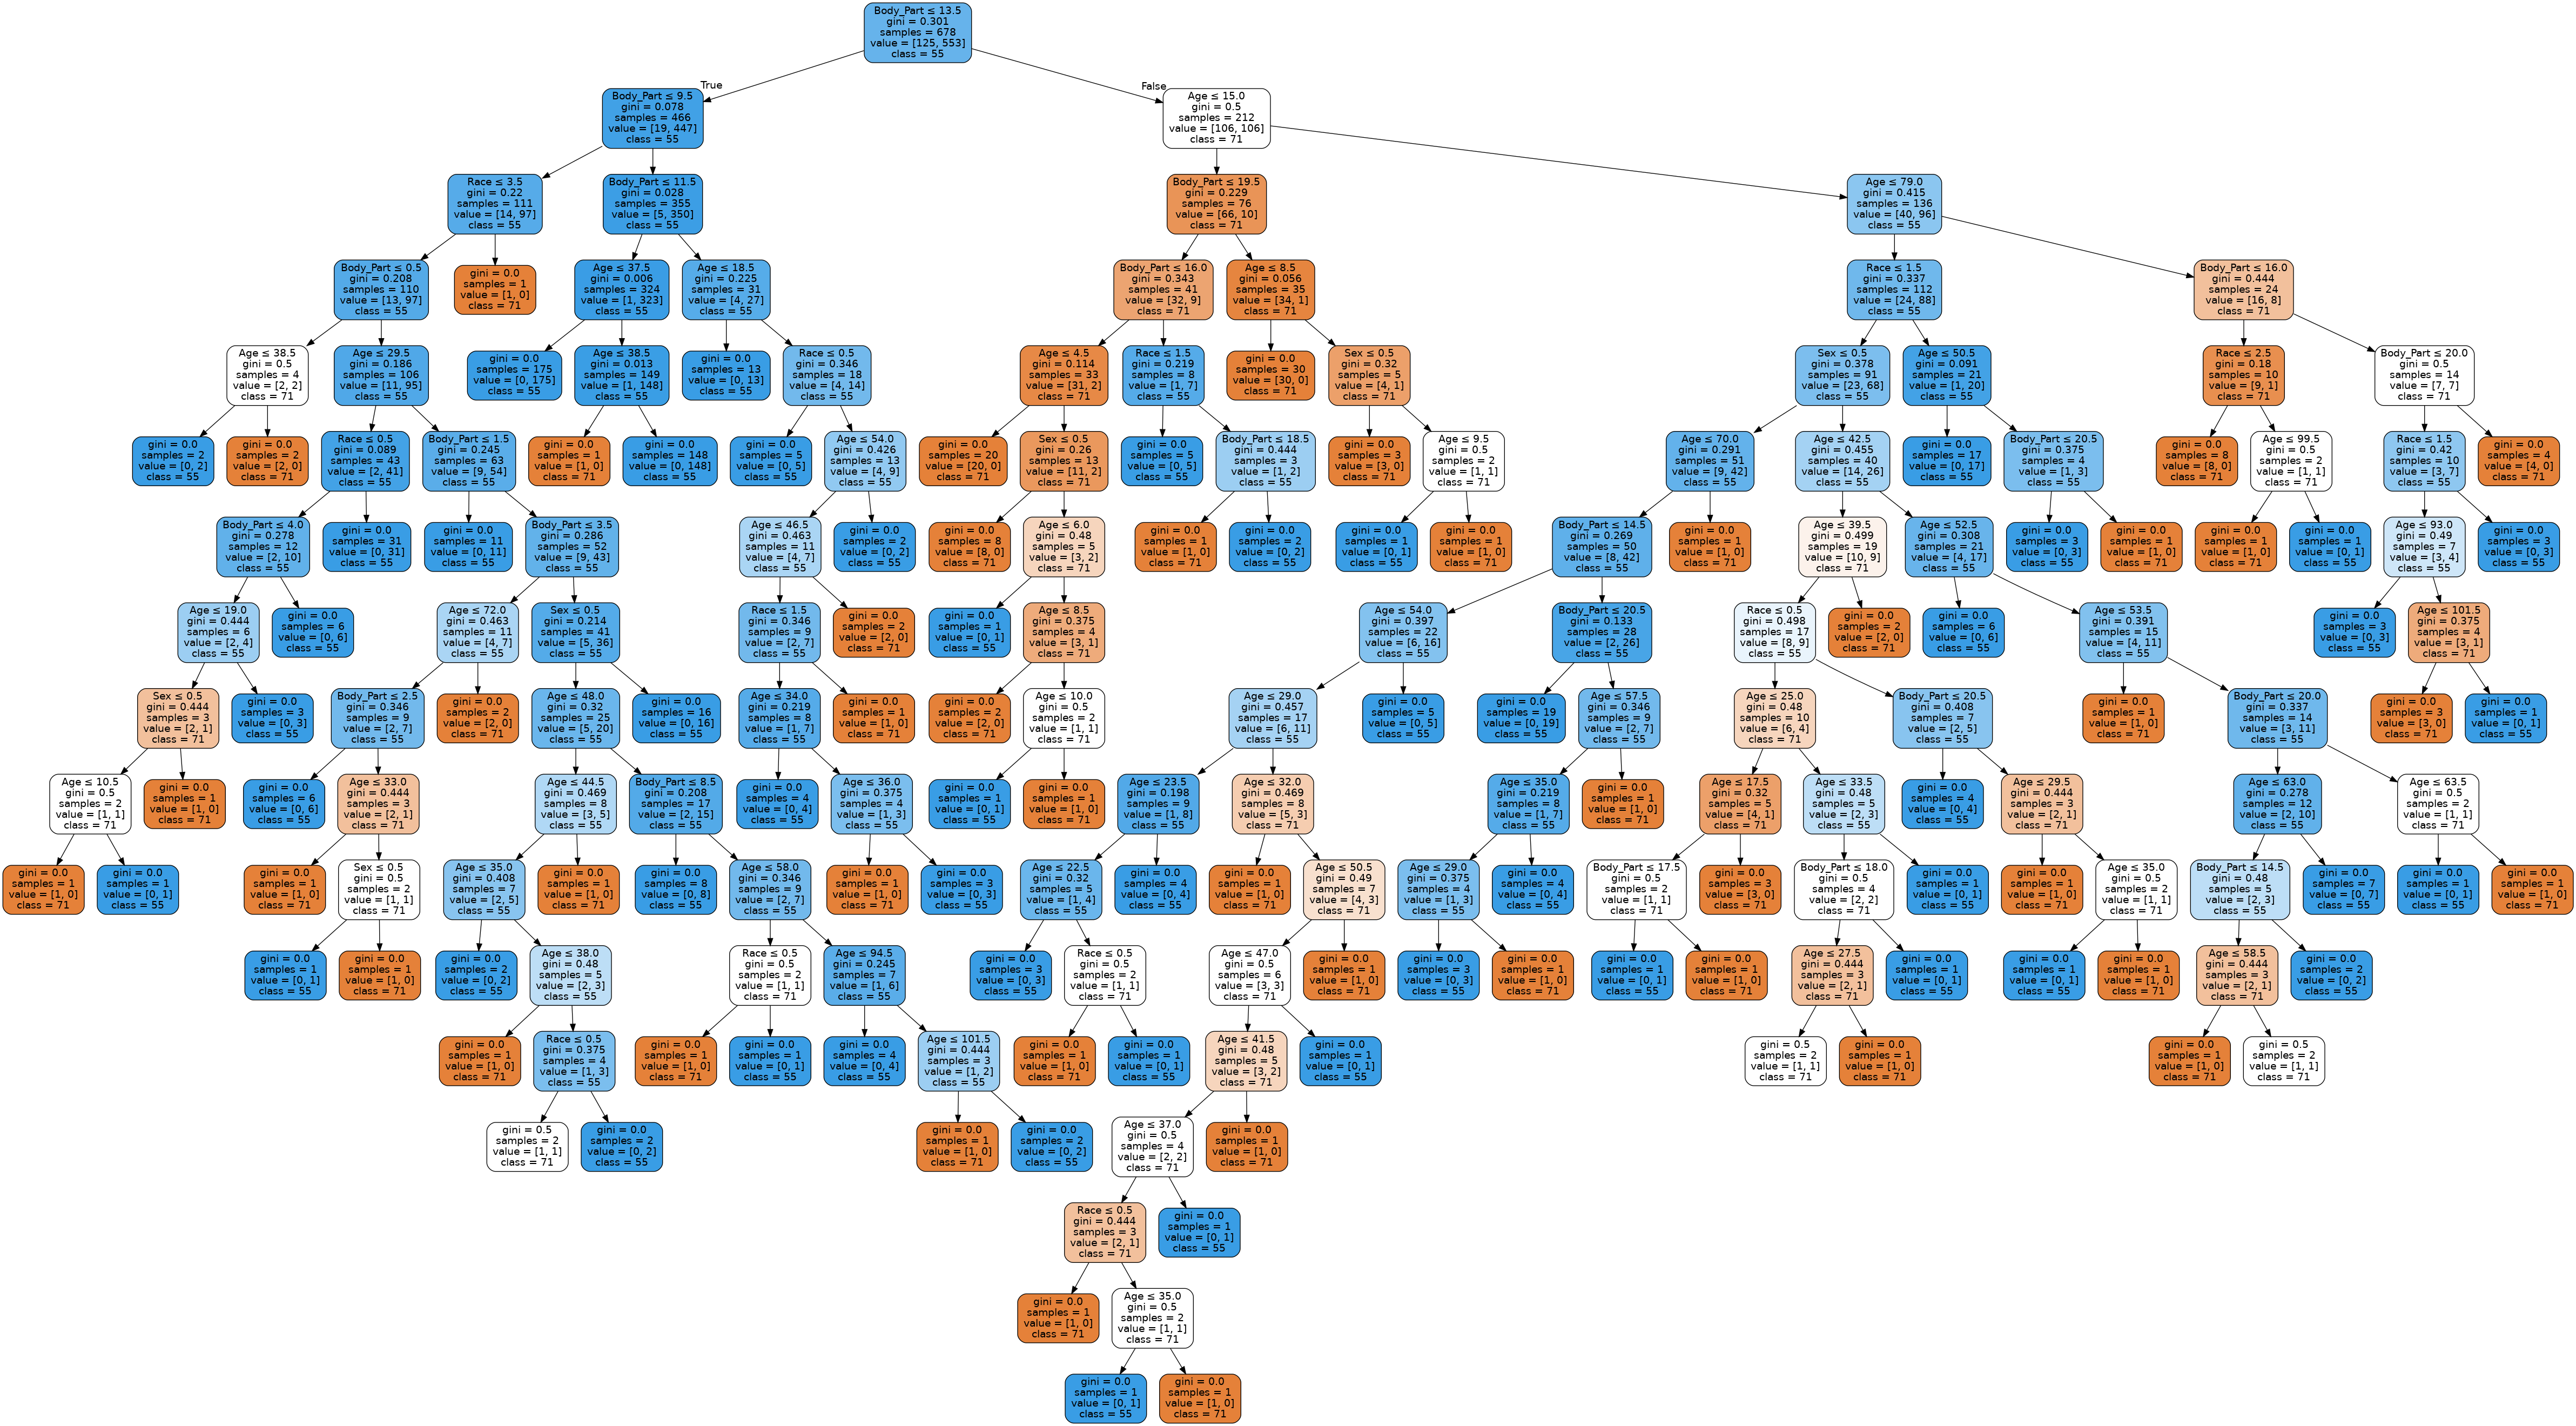

In [137]:
feature_cols = ["Age", "Sex", "Race", "Body_Part"]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,
    class_names=diagnosis)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../../outputs/demographic-burninjury.png')
Image(graph.create_png())